# Vibrações com Forçamento Harmônico

Professor Paulo Victor

---
**Atenção:**

Este material serve apenas como um guia para estudos e para as aulas, não substituindo a leitura dos livros indicados e é de uso exclusivo dos alunos do CEFET/RJ campus Angra dos Reis.

---

## Forçamento Harmônico com Amplitude Constante

In [7]:
from IPython.display import Image

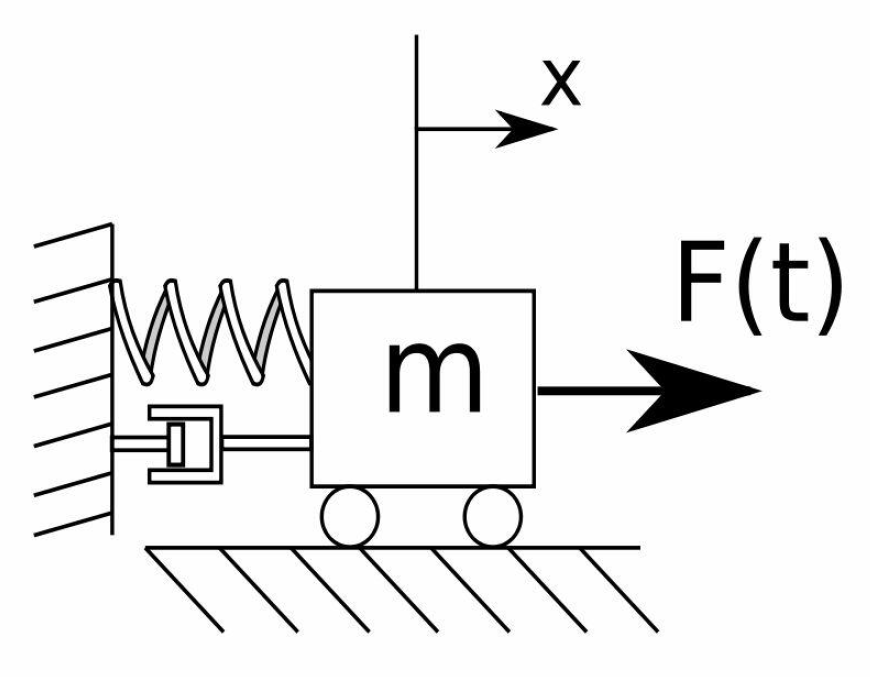

In [8]:
Image('figuras/fig3-1.png',width = 600)

$F(t) = F_0 sen (\omega t)$

Equação de movimento: 

$m \ddot{x} + c \dot{x} + k x = F_0 sen (\omega t)$



In [10]:
from sympy import *

In [11]:
m,c,k = symbols('m c k', positive = True)
t = symbols('t')
x = Function('x')(t)
Fo,omega = symbols('F0 omega',positive = True)
A,B = symbols('A B')
xF = Function('x_F')(t)

In [12]:
EDM = Eq(m*x.diff(t,2) + c*x.diff(t) + k*x,Fo*sin(omega*t))
EDM

Eq(c*Derivative(x(t), t) + k*x(t) + m*Derivative(x(t), (t, 2)), F0*sin(omega*t))

Solução:

$x(t) = x_L(t) + x_F(t)$

Onde:

$x_L(t)$ é a solução homogênea

$x_F(t)$ é a solução particular

para $\zeta < 1$: 

$x_L(t) = X_1 e^{-\zeta \omega_n t} sen (\sqrt{1 - \zeta^2} \omega_n t + \phi_1)$


Considerando o modelo de excitação por força harmônica: 

Vamos supor que a resposta forçada seja uma oscilação harmônica com a mesma frequência da força excitadora.

$x_F(t) = A sen (\omega t) + B cos (\omega t)$


In [16]:
Eq1 = Eq(xF,A*sin(omega*t) + B*cos(omega*t))
Eq1

Eq(x_F(t), A*sin(omega*t) + B*cos(omega*t))

Substituindo essa resposta na equação de movimento:

In [18]:
Eq2 = Eq(m*xF.diff(t,2),(m*Eq1.rhs.diff(t,2)).expand())
Eq2

Eq(m*Derivative(x_F(t), (t, 2)), -A*m*omega**2*sin(omega*t) - B*m*omega**2*cos(omega*t))

In [19]:
Eq3 = Eq(c*xF.diff(t),(c*Eq1.rhs.diff(t)).expand())
Eq3

Eq(c*Derivative(x_F(t), t), A*c*omega*cos(omega*t) - B*c*omega*sin(omega*t))

In [20]:
Eq4 = Eq(k*xF,(k*Eq1.rhs).expand())
Eq4

Eq(k*x_F(t), A*k*sin(omega*t) + B*k*cos(omega*t))

In [21]:
Eq5 = Eq(Eq2.rhs + Eq3.rhs + Eq4.rhs ,Fo*sin (omega*t))
Eq5

Eq(A*c*omega*cos(omega*t) + A*k*sin(omega*t) - A*m*omega**2*sin(omega*t) - B*c*omega*sin(omega*t) + B*k*cos(omega*t) - B*m*omega**2*cos(omega*t), F0*sin(omega*t))

Separando os cossenos dos senos:

In [23]:
Eq6 = Eq(Eq5.lhs.subs(cos(omega*t),0),Fo*sin(omega*t))
Eq6

Eq(A*k*sin(omega*t) - A*m*omega**2*sin(omega*t) - B*c*omega*sin(omega*t), F0*sin(omega*t))

In [24]:
Eq7 = Eq(Eq5.lhs.subs(sin(omega*t),0),0)
Eq7

Eq(A*c*omega*cos(omega*t) + B*k*cos(omega*t) - B*m*omega**2*cos(omega*t), 0)

In [25]:
sol_A_B = solve([Eq6,Eq7],A,B)
sol_A_B

{A: F0*k/(c**2*omega**2 + k**2 - 2*k*m*omega**2 + m**2*omega**4) - F0*m*omega**2/(c**2*omega**2 + k**2 - 2*k*m*omega**2 + m**2*omega**4),
 B: -F0*c*omega/(c**2*omega**2 + k**2 - 2*k*m*omega**2 + m**2*omega**4)}

In [26]:
A_sol = Eq(A,sol_A_B[A]).simplify()
A_sol

Eq(A, F0*(k - m*omega**2)/(c**2*omega**2 + k**2 - 2*k*m*omega**2 + m**2*omega**4))

In [27]:
B_sol = Eq(B,sol_A_B[B]).simplify()
B_sol

Eq(B, -F0*c*omega/(c**2*omega**2 + k**2 - 2*k*m*omega**2 + m**2*omega**4))

Substituindo as soluções de $A$ e $B$ em $x_F(t) = A sen (\omega t) + B sen (\omega t)$:

In [29]:
Eq8 = Eq(xF,(Eq1.rhs).subs({A:A_sol.rhs,B:B_sol.rhs}))
Eq8

Eq(x_F(t), -F0*c*omega*cos(omega*t)/(c**2*omega**2 + k**2 - 2*k*m*omega**2 + m**2*omega**4) + F0*(k - m*omega**2)*sin(omega*t)/(c**2*omega**2 + k**2 - 2*k*m*omega**2 + m**2*omega**4))

Para representar de forma mais compacta, podemos usar:

$tg \phi = \dfrac{c \omega}{k - m \omega^2}$

$X_F = \dfrac{F_0}{\sqrt{(k-m\omega^2)^2 + (c \omega)^2}}$

Deste modo a resposta forçada pode ser escrita como: 

$x_F(t) = X_F sen(\omega t - \phi)$

A resposta forçada é portanto, um deslocamento harmônico com a mesma frequência $\omega[rad/s]$ e atraso de fase $\phi[rad]$ em relação à força excitadora.

$$x(t) = X_1 e^{-\zeta \omega_n t}sen \left( \sqrt{1 - \zeta^2} \omega_n t + \phi_1 \right) + X_F sen (\omega t - \phi)$$

Em python, a resposta do sistema pode ser obtida usando: 

```
x0,v0 = symbols('x_0 v_0') # condições iniciais
sol = dsolve(EDM,ics={x.subs(t,0):x0,x.diff(t).subs(t,0):v0})
```

In [33]:
x0,v0 = symbols('x_0 v_0') # condições iniciais
sol = dsolve(EDM,ics={x.subs(t,0):x0,x.diff(t).subs(t,0):v0})

In [34]:
dic = {m:1,c:20*0.05,k:100,Fo:5,omega:5,x0:0.5,v0:0}

In [35]:
x_t = sol.rhs.subs(dic)

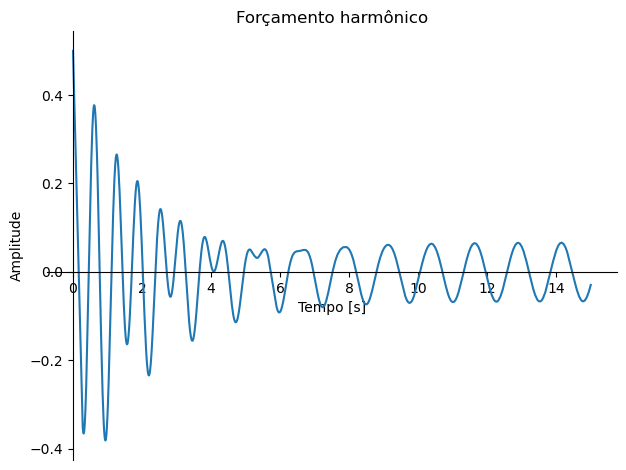

In [36]:
plt = plot(x_t,(t,0,15),show=False)
plt.title = 'Forçamento harmônico'
plt.xlabel = 'Tempo [s]'
plt.ylabel = 'Amplitude'
plt.show()

A amplitude forçada $X_F$ e o ângulo de fase $\phi$ podem ser apresentados em termos de parâmetros adimensionais, resultando assim expressões válidas independentemente do sistema de unidades usado para expressar os parâmetros físicos do sistema.

$$\dfrac{X_F}{\left(\dfrac{F_0}{k}\right)} = \dfrac{1}{\sqrt{\left[1-\left(\dfrac{\omega}{\omega_n}\right)^2 \right]^2 + \left(2 \zeta \dfrac{\omega}{\omega_n} \right)^2}}$$

$$tg \phi = \dfrac{2 \zeta \left( \dfrac{\omega}{\omega_n} \right)}{1 - \left( \dfrac{\omega}{\omega_n} \right)^2}$$

$\dfrac{F_0}{k}$ é a deflexão que ocorreria se a força $F_0$ atuasse estaticamente. 

A relação entre a amplitude da resposta forçada $X_F$ e a deflexão estática $\left( \dfrac{F_0}{k} \right)$ é denominada **Fator de Ampliação**. 

$$|H(\omega)| = \dfrac{X_F}{\left( \dfrac{F_0}{k} \right)}$$

In [39]:
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def Hw(zeta):
    rw = np.linspace(0,5,500)
    H = 1/(np.sqrt((1-(rw)**2)**2 + (2*zeta*rw)**2))
    plt.plot(rw,H)
    plt.ylim(0,10)
    plt.grid(True)
    plt.xlabel(r'$\dfrac{\omega}{\omega_n}$')
    plt.ylabel(r'$|H(\omega)|$')
    uns = np.linspace(1,1,500)
    plt.plot(rw,uns)

In [41]:
interact(Hw,zeta=(0.0,1.2,0.01))

interactive(children=(FloatSlider(value=0.6, description='zeta', max=1.2, step=0.01), Output()), _dom_classes=…

<function __main__.Hw(zeta)>

In [42]:
def Psi(zeta):
    rw = np.linspace(0,5,500)
    psi = np.arctan(2*zeta*rw/(1-rw**2))
    plt.plot(rw,psi)
    plt.ylim(-np.pi/2,np.pi/2)
    plt.grid(True)
    plt.xlabel(r'$\dfrac{\omega}{\omega_n}$')
    plt.ylabel(r'$\phi$')

In [43]:
interact(Psi,zeta=(0.05,1.2,0.01))

interactive(children=(FloatSlider(value=0.6200000000000001, description='zeta', max=1.2, min=0.05, step=0.01),…

<function __main__.Psi(zeta)>

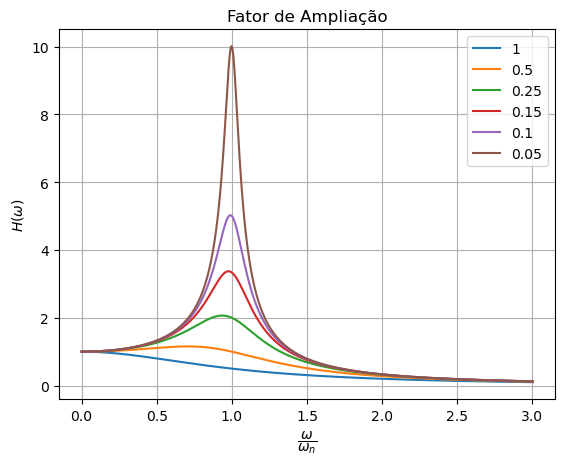

In [44]:
Zeta=[1, 0.5, 0.25, 0.15, 0.1, 0.05]
rw=np.linspace(0,3,1000) # w/wn
def H(zeta):
    return 1/(np.sqrt((1 - (rw)**2)**2 + (2*zeta*rw)**2))
plt.figure()
for i in range (0,len(Zeta)):
    Hi=H(Zeta[i])
    plt.plot(rw,Hi)
plt.title('Fator de Ampliação')
plt.ylabel(r'$H(\omega)$')
plt.xlabel(r'$\dfrac{\omega}{\omega_n}$')
plt.grid(True)
plt.legend([str(Zeta[0]),str(Zeta[1]),str(Zeta[2]),str(Zeta[3]),str(Zeta[4]),str(Zeta[5])])
plt.show()

$ \rightarrow$ A amplitude da resposta vai depender não apenas da amplitude da força, mas também da frequência com a qual ela é aplicada e do fator de amortecimento do sistema.

$ \rightarrow$ Para sistemas fracamente amortecidos ($\zeta <<1$), quando a frequência da força excitadora coincide com a frequência natural do sistema $\dfrac{\omega}{\omega_n} = 1$ ocorrem valores elevados da resposta : **ressonância:** $|H(\omega)| >>1$.



$ \rightarrow$ De um modo geral, para quaisquer valores de $ \zeta$, a frequência adimensional na qual ocorre a amplitude máxima da resposta é determinada quando: 

$\dfrac{d}{d \left(\dfrac{\omega}{\omega_n}\right)} |H(\omega)| = 0$

A frequência na qual ocorre o máximo é:

$\left(\dfrac{\omega}{\omega_n}\right)_{|H|_{max}} = \sqrt{1 - 2 \zeta^2}$

$|H(\omega)|_{max} = \dfrac{1}{2 \zeta \sqrt{1 - \zeta^2}}$

A amplitude de resposta quando $\dfrac{\omega}{\omega_n} =1 $ é:

$|H(\omega)| = \dfrac{1}{2\zeta}$

A  figura a seguir é uma representação da amplitude da resposta em frequência em termos da velocidade $\dot{x}$ em função da frequência adimensional $\left(\dfrac{\omega}{\omega_n}\right)$

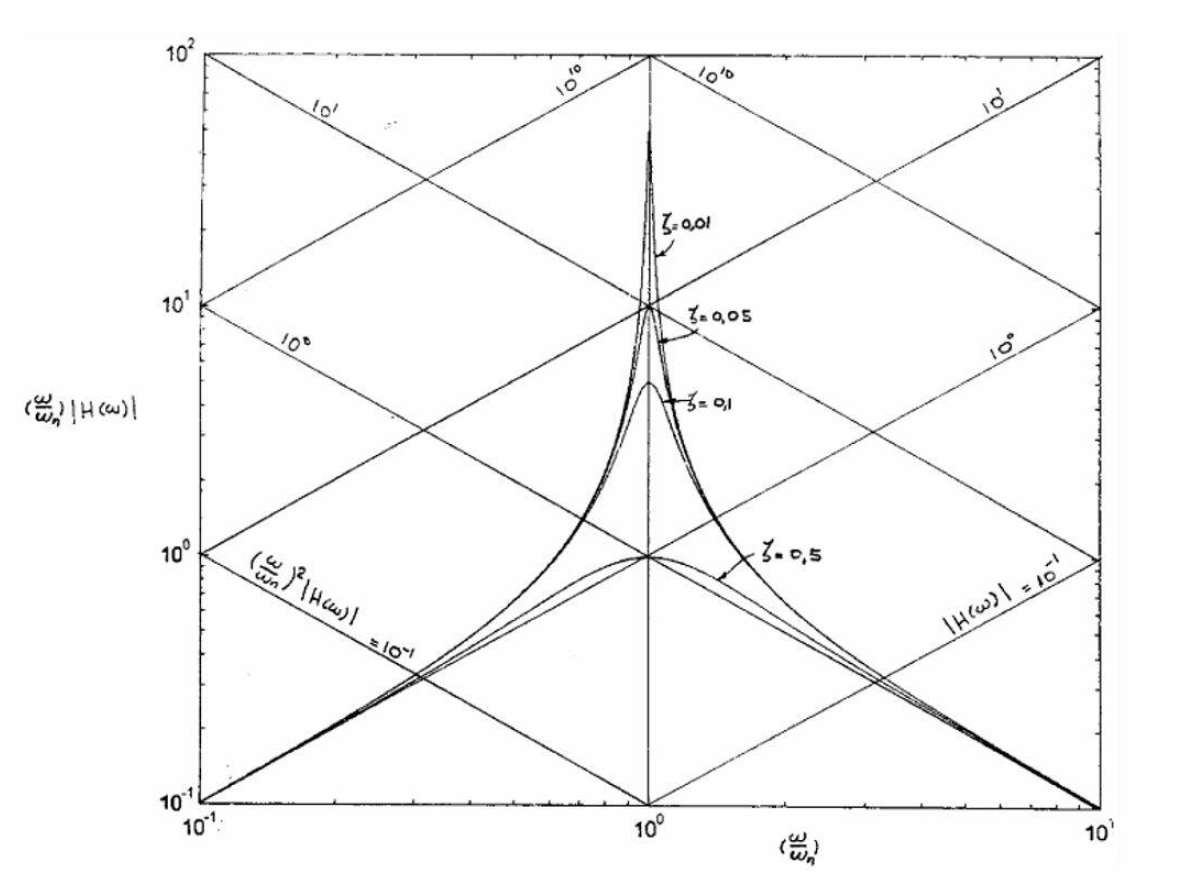

In [48]:
Image('figuras/fig3-2.png',width=600)

$\rightarrow$ Observamos que o valor máximo da amplitude da resposta em velocidade ocorre quando $\left(\dfrac{\omega}{\omega_n} \right) = 1$, independentemente do fator de amortecimento do sistema.

$\rightarrow$ Considerando que, segundo várias normas internacionais, a severidade de vibração está associada à energia cinética do movimento vibratório $\rightarrow$ por isso é lógico caracterizar a ressonância como a situação na qual a frequência da força excitadora coincide com a frequência não amortecida do sistema.

$\left(\dfrac{\omega}{\omega_n}\right) = 1$

## Notação Complexa

$F(t) = F_0 sen ( \omega t)$ ou $F(t) = F_0 cos (\omega t)$

Notação complexa: 

$F(t) = F_0 e ^{i \omega t}$ $\rightarrow$ não é fisicamente válida, mas facilita a manipulação algébrica. 

Fisicamente válidas:

$F_0 sen ( \omega t) = \dfrac{F_0}{2i} \left( e^{i \omega t} + e^{- i \omega t} \right) $

$\Rightarrow$ $m \ddot{x} + c \dot{x} + k x = F_0 e^{i \omega t}$

Supõe-se a resposta forçada como:

$x_F(t) = X_F e^{i (\omega t - \phi)}$

Substituindo na equação de movimento: 

$X_F e^{-i \phi} = \dfrac{F_0}{k - m\omega^2 + ic \omega}$

A amplitude da resposta forçada será:

$X_F = \left| X_F e^{-i \phi} \right| $

$$X_F = \dfrac{F_0}{\sqrt{\left( k - m \omega^2 \right)^2 + \left( c \omega \right) ^2 }}$$

O atraso de fase $\phi$ será dado por: 

$tg \phi = - \dfrac{\mathscr{I} \{X_F e^{-i \phi}\}}{\mathscr{R}\{X_F e^{-i \phi}\}}$

$$tg \phi = \dfrac{c \omega}{k - m \omega^2}$$

Observação: Nesta notação, a amplitude da força harmônica atuando no sistema é $\dfrac{F_0}{2}$ e a amplitude da resposta física em deslocamento é $\dfrac{X_F}{2}$. As relações adimensionais $|H(\omega)| = \dfrac{X_F}{(F_0/k)}$ e $tg \phi$ permanecem válidas, mas este fato terá relevância ao se considerar o trabalho exercido pela força excitadora harmônica sobre o deslocamento de seu ponto de aplicação. 

## Impedância Mecânica

$\rightarrow$ Impedância mecânica é a relação entre a força excitadora e a resposta em velocidade: 

$Z_M = \dfrac{F(t)}{\dot{x}_F(t)}$

$Z_M = c + i\left( \omega m - \dfrac{k}{m} \right)$

* A parte real, ou resistiva, da impedância está associada ao elemento dissipador de energia, ou amortecedor
* A parte imaginária, ou reativa, da impedância está associada aos elementos conservativos, elementos elásticos e de inércia.

$\rightarrow$ O conceito de ressonância está associado à anulação da parte reativa da impedância. Na ressonância, as energias cinética e potencial se equilibram, restando apenas o amortecedor para dissipar a energia introduzida no sistema pelo trabalho da força excitadora. 

Da expressão da impedância mecânica para o sistema de um grau de liberdade, vemos que quando: 

$\omega^2 << \dfrac{k}{m} \rightarrow$ a impedância da mola é a parcela mais importante

$\omega^2 = \dfrac{k}{m} \rightarrow$ só o amortecedor é responsável pela impedância

$\omega^2 << \dfrac{k}{m} \rightarrow$ a massa é o fator dominante

Outras grandezas utilizadas frequentemente por analistas de vibração são: 

mobilidade = $\dfrac{\dot{x}_F(t)}{F(t)} = \dfrac{1}{Z_M}$

inertância = $\dfrac{\ddot{x}_F(t)}{F(t)}$

admitância = $\dfrac{x_F(t)}{F(t)}$

## Analogia Eletro-Mecânica

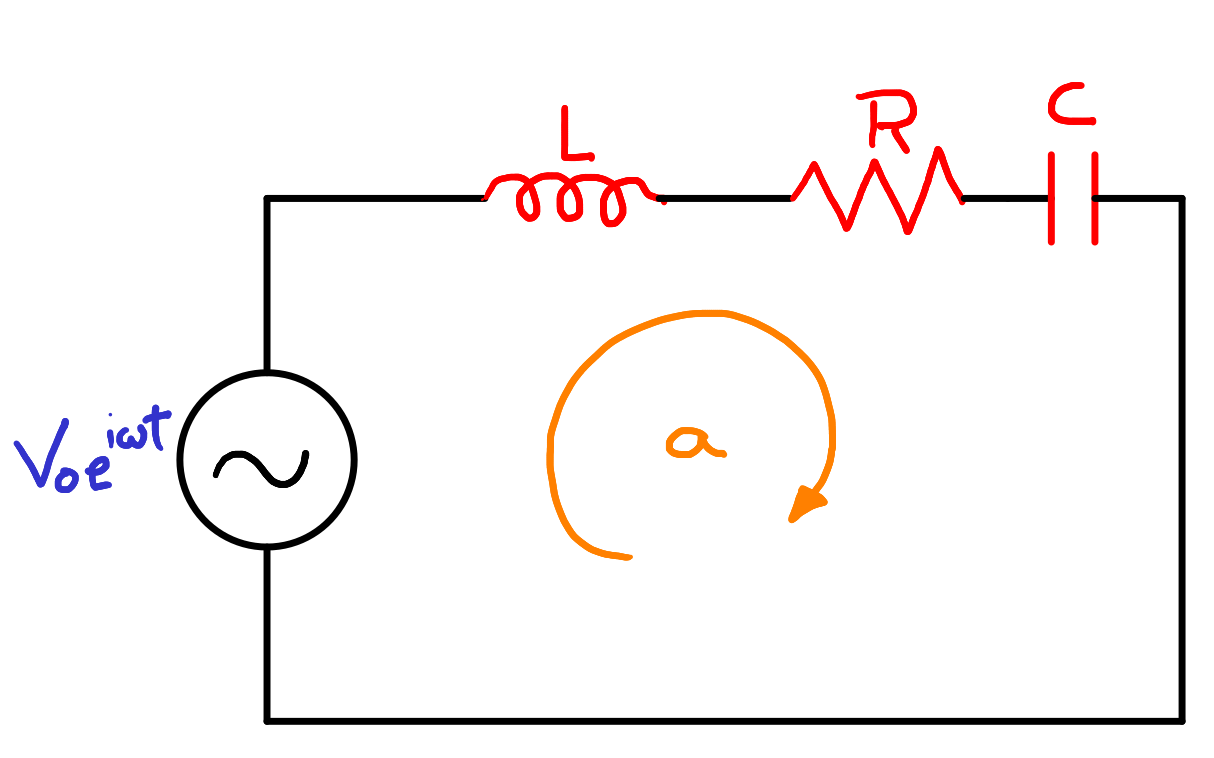

In [61]:
Image('figuras/fig3-3.png',width=500)

Seja $a(t) = A e^{i(\omega t - \phi)}$ a corrente elétrica que circula na malha. 

As quedas de tensão em cada um dos componentes do circuito são respectivamente: 

$\Delta V_L = L \dfrac{da}{dt}$ na bobina com indutância $L$;

$\Delta V_R = R a$ na resistência $R$;

$\Delta V_C = \dfrac{1}{C}\int a dt$ no capacitor com capacitância $C$.

A tensão elétrica aplicada pelo gerador tem que igualar a soma das quedas de tensão nos elementos do circuito: 

$V_0 e { i\omega t} = \left( R + i \left( \omega L \dfrac{1}{\omega C} \right) \right) A e^{i(\omega t - \phi)}$

A impedância elétrica do circuito vista pelo gerador é:

$Z_E = \dfrac{V(t)}{a(t)}$

$Z_E = R + i \left(\omega L - \dfrac{1}{\omega C} \right)$

| Sistema Mecânico | Circuito Elétrico |
| --- | --- |
|C: coeficiente de amortecimento viscoso| R: resistência elétrica |
|m: massa | L: indutância |
|k: rigidez da mola | (1/C): inverso da capacistância|

## Isolamento da Vibração

$\rightarrow$ Isolamento da fonte para que a vibração nela gerada não seja transmitida ao ambiente.

$\rightarrow$ Isolamento da vibração ambiental para que ela não seja transmitida a um equipamento cujo desempenho ou integridade possa ser afetado por ela. 

### Isolamento da Fonte de Vibração

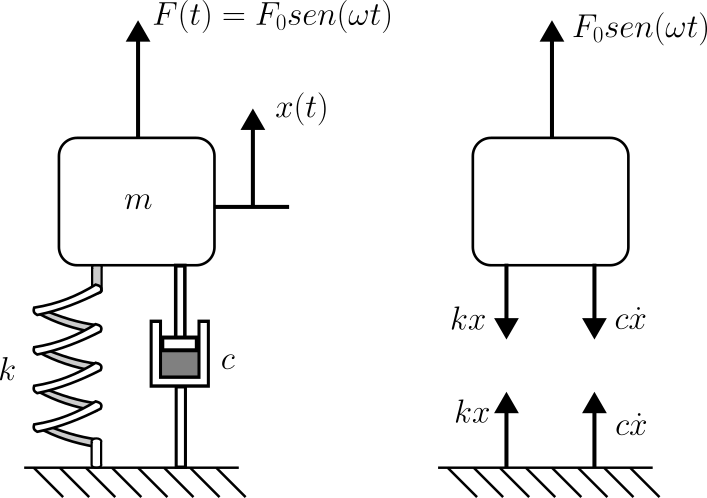

In [69]:
Image('figuras/fig3-4.png',width=600)

$F(t) = F_0 e^{i \omega t}$

$x_F(t) = X_F e^{i (\omega t - \phi)}$

A força transmitida ao ambiente pela mola e amortecedor é:

$F_T(t) = (k + i c \omega) X_F e^{i (\omega t - \phi)}$

A grandeza adimensional usada para avaliar a eficiência de um sistema de isolamento é a transmissibilidade. 

$ T = \left| \dfrac{F_T}{F_0} \right|$

$T = \sqrt{\dfrac{k^2 + (c \omega)^2}{\left(k-m\omega^2\right)^2 + (c \omega)^2}}$

Na forma adimensional:

$T = \sqrt{\dfrac{1 + \left( 2 \zeta \dfrac{\omega}{\omega_n} \right)^2}{\left[1 - \left(\dfrac{\omega}{\omega_n}\right)^2 \right]^2 + \left(2 \zeta \dfrac{\omega}{\omega_n}\right)^2}}$

Observações:

* $\dfrac{\omega}{\omega_n} < \sqrt{2} \rightarrow T > 1 \rightarrow$ Amplificação $\rightarrow$ A amplitude da força na fonte é menor que a amplitude da força transmitida - O amortecimento contribui favoravelmente para limitar a amplificação.
* $\dfrac{\omega}{\omega_n} = \sqrt{2} \rightarrow T = 1$
* $\dfrac{\omega}{\omega_n} > \sqrt{2} \rightarrow T < 1 \rightarrow$ Isolamento $\rightarrow$ A amplitude da força transmitida ao ambiente é menor que a amplitude da força gerada na fonte - o amortecimento é desfavorável e o melhor isolamento é conseguido para $\zeta = 0$.

O atraso de fase $\phi_T$ entre a força transmitida ao ambiente $F_T(t)$ e a força gerada na fonte $F(t)$ é dado pela expressão: 

$tg \phi_T = \dfrac{m c \omega^3}{k \left( k - m \omega^2\right) + c^2 \omega^2}$

Ou, expressa em termos de parâmetros adimensionais: 

$tg \phi_T = \dfrac{2 \zeta \left( \dfrac{\omega}{\omega_n} \right)^3}{1 - \left(\dfrac{\omega}{\omega_n}\right)^2 + \left( 2 \zeta \dfrac{\omega}{\omega_n}\right)^2}$

### Movimento Harmônico do Suporte

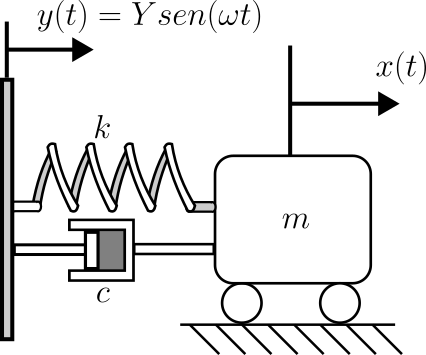

In [75]:
Image('figuras/fig3-5.png',width=400)

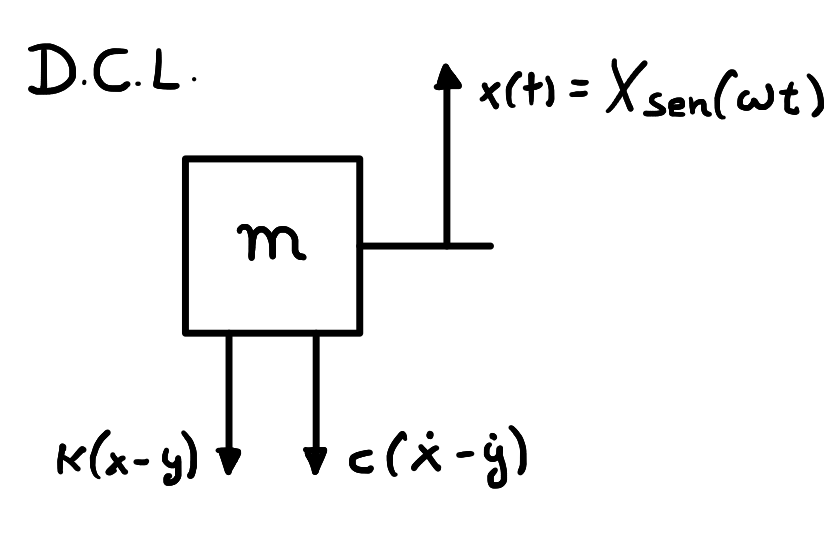

In [76]:
Image('figuras/fig3-6.png',width=600)

Equação de Movimento:

$m \ddot{x} + c \dot{x} + kx = c \dot{y} + k y$

Supondo:

$x(t) = Xe^{i(\omega t - \phi)}$

$y(t) = Y e^{i \omega t}$

Substituindo na equação diferencial de movimento, temos:

$(-m \omega^2 + i c \omega + k) X e^{-i \phi} = (k + i c \omega) Y$

$\dfrac{X}{Y} e ^{-i \phi} = \dfrac{k + i c \omega}{k - m \omega^2 + i c \omega}$

Extraindo o módulo:

$\left| \dfrac{X}{Y} \right| = \sqrt{\dfrac{k^2 + (c \omega)^2}{\left(k - m \omega^2 \right)^2 + (c \omega)^2}}$

A razão entre as amplitudes em termos de parâmetros adimensionais assume a forma: 

$\left| \dfrac{X}{Y} \right| = \sqrt{\dfrac{1 + \left( 2 \zeta \dfrac{\omega}{\omega_n}\right)^2}{\left[1 - \left( \dfrac{\omega}{\omega_n} \right)^2 \right]^2 + \left(2 \zeta \dfrac{\omega}{\omega_n}\right)^2}}$

$tg \phi = \dfrac{m c \omega^3}{k\left(k-m\omega^2 \right) + c \omega^2}$

ou, 

$tg \phi = \dfrac{2 \zeta \left( \dfrac{\omega}{\omega_n}\right)^2}{1 - \left(\dfrac{\omega}{\omega_n}\right)^2 + \left(2 \zeta \dfrac{\omega}{\omega_n} \right)^2}$

### Exemplo:

O sistema mostrado na figura a seguir consiste de uma haste rígida de massa desprezível e comprimento $(L + b)$, de uma massa pontual $m$, da mola de rigidez $k$ e do amortecedor viscoso de coeficiente de amortecimento $c$. O eixo excêntrico impõe à extremidade do amortecedor um deslocamento harmônico $y(t) = Y e^{i \omega t}$. Determinar: 

a) a amplitude da pequena oscilação angular forçada $\theta$ da haste em torno do pino $O$;  
b) a relação de fase entre $\theta$ e $y(t)$. 


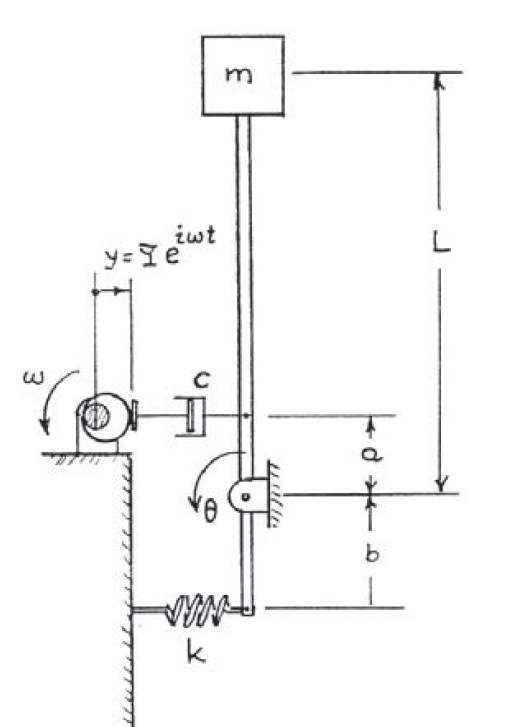

In [81]:
Image('figuras/fig3-7.png',width=400)

## Excitação de Desbalanceamento

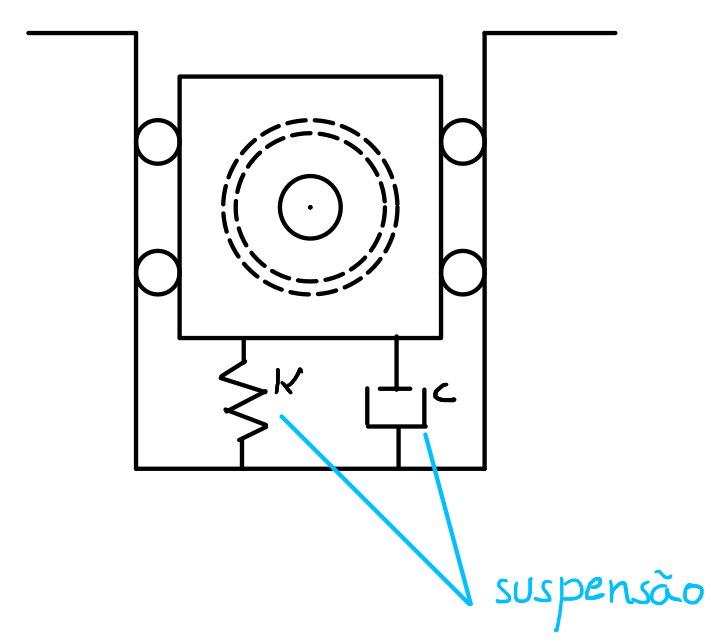

In [83]:
Image('figuras/fig3-8.png',width=500)

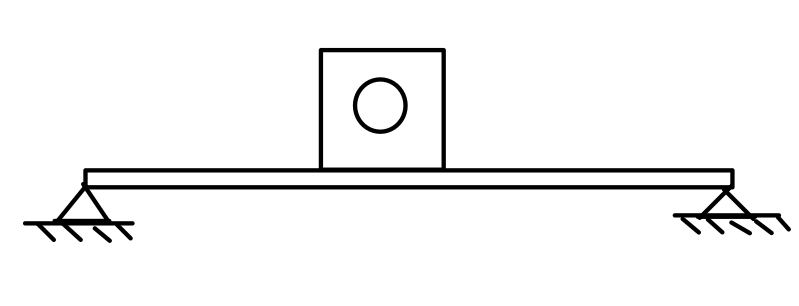

In [84]:
Image('figuras/fig3-9.png',width=500)

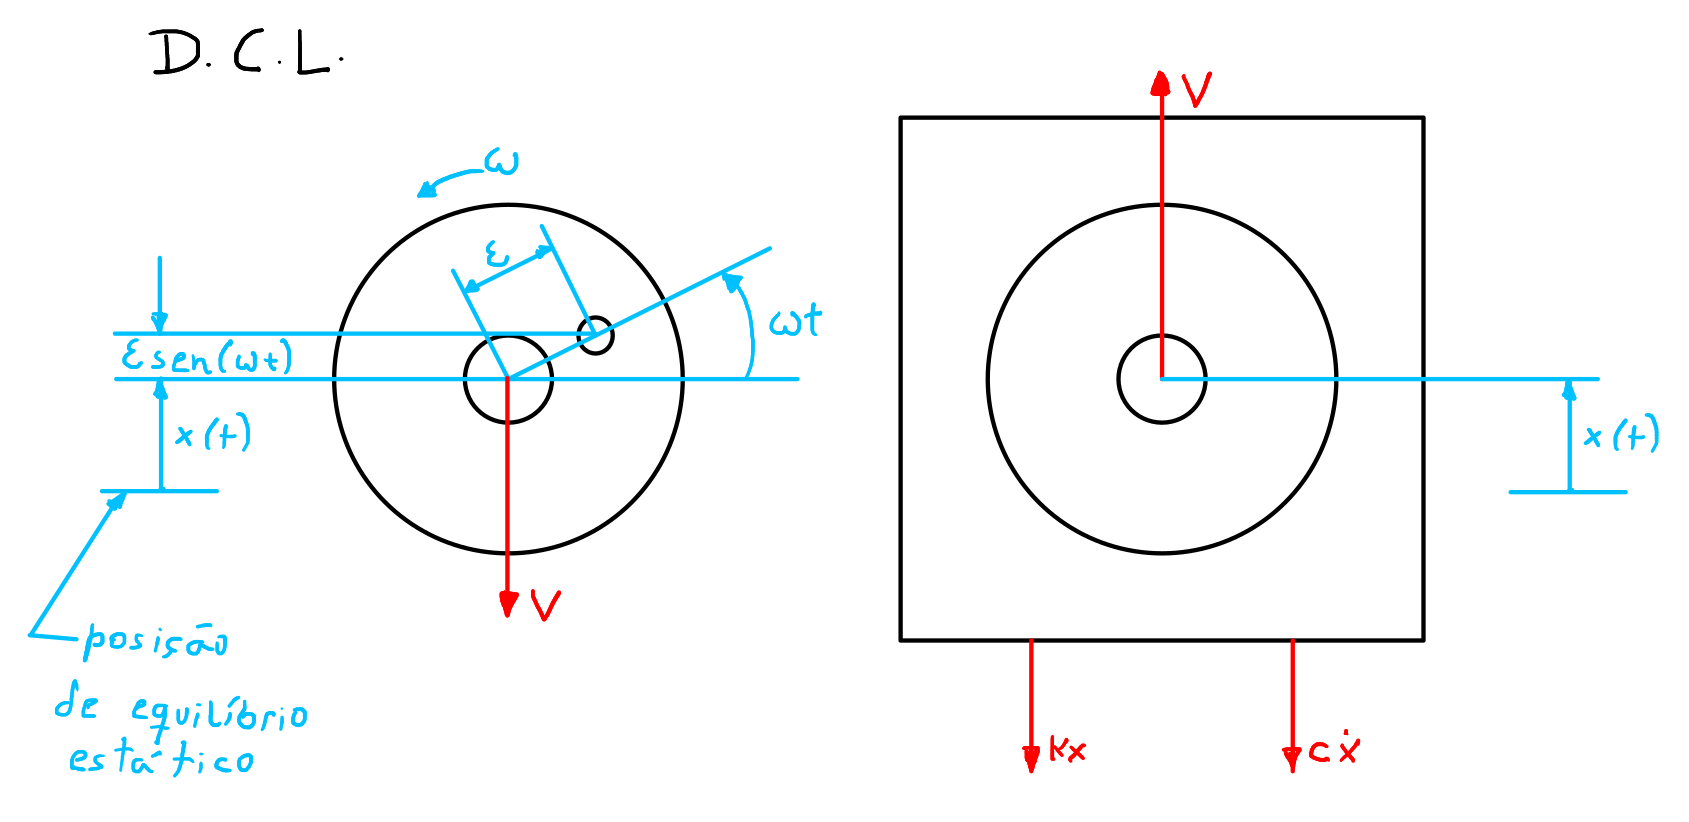

In [85]:
Image('figuras/fig3-10.png',width=700)

$M \rightarrow$ massa total da máquina

$m \rightarrow$ massa do rotor

$\omega \rightarrow$ velocidade angular do rotor

$\epsilon \rightarrow$ excentricidade do centro de massa do rotor em relação ao seu eixo de rotação

$(M-m) \rightarrow$ massa do massa do estator

$k \rightarrow$ rigidez da suspensão sobre o qual está apoiada a máquina

$c \rightarrow$ coeficiente de amortecimento da suspensão

$x(t) \rightarrow$ a deflexão dinâmica da máquina a partir de sua posição de equilíbrio estático, quando apoiada na suspensão. Neste modelo de um grau de liberdade, supõe-se que a vibração da máquina admite deslocamento apenas em uma direção; no caso abordado, na direção vertical. 

$V(t) \rightarrow$ a componente vertical da reação dos mancais. 

* Supondo o mancal sem folga radial, a deflexão dinâmica do centro do rotor é igual à deflexão $x(t)$ do centro do mancal.
* Quando o rotor está em uma posição angular $(\omega t)$, o deslocamento vertical do centro de massa do rotor é $x(t) + \epsilon sen (\omega t)$. A reação vertical sentida pelo rotor é $-V(t)$. 

A equação de movimento do rotor é:

$-V = m \dfrac{d^2}{dt^2}(x + \epsilon sen \omega t)$

A equação de movimento vertical do estator é:

$V - kx - c \dot{x} = (M - m) \ddot{x}$

Eliminando a força de vínculo $V$:

$(M - m) \ddot{x} + c \dot{x} + kx = -m\dfrac{d^2}{dt^2}(x + \epsilon sen \omega t)$

A equação diferencial do conjunto é:

$M\ddot{x} + c \dot{x} + kx = \left(m \omega^2 \epsilon \right) sen \omega t$

A resposta de um sistema de um grau de liberdade à excitação de desbalanceamento é:

$x_D(t) =X_D sen( \omega t - \phi)$

sendo a amplitude de resposta $\rightarrow$ $X_D = \dfrac{m \epsilon \omega^2}{\sqrt{\left(k - M \omega^2\right)^2 + (c \omega)^2}}$

e o atraso de fase:

$tg \phi = \dfrac{c \omega}{k- M \omega^2}$

A frequência natural é:

$\omega_n = \sqrt{\dfrac{k}{M}}$



As amplitude e fase de resposta em termos de parâmetros adimensionais têm a forma:

$X_D=\dfrac{\dfrac{m}{M}\epsilon \left(\dfrac{\omega}{\omega_n}\right)^2}{\sqrt{\left[1 - \left(\dfrac{\omega}{\omega_n}\right)^2\right]^2 + \left(2\zeta \dfrac{\omega}{\omega_n}\right)^2}}$

$tg \phi = \dfrac{ 2 \zeta \dfrac{\omega}{\omega_n}}{1 - \left( \dfrac{\omega}{\omega_n}\right)^2}$

* O gráfico de atraso de fase é o mesmo do modelo de excitação por força de amplitude constante, já apresentado anteriormente

A amplitude da resposta ao deslocamento $(m \epsilon)$ pode ser apresentada de forma adimensional:

$\dfrac{M X_D}{m \epsilon} = \dfrac{\left(\dfrac{\omega}{\omega_n}\right)^2}{\sqrt{\left[1 - \left(\dfrac{\omega}{\omega_n}\right)^2\right]^2 + \left(2 \zeta \dfrac{\omega}{\omega_n}\right)^2}}$

É interessante observar que:

$\dfrac{M X_D}{m \epsilon} = \left(\dfrac{\omega}{\omega_n}\right)^2 |H(\omega)|$

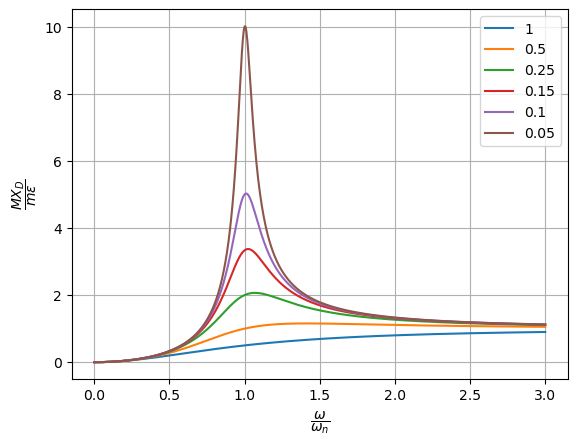

In [93]:
Zeta=[1, 0.5, 0.25, 0.15, 0.1, 0.05]
rw=np.linspace(0,3,1000) # w/wn

def amp_desb(zeta):
    return rw**2/(np.sqrt((1-rw**2)**2 + (2*zeta*rw)**2))
    
plt.figure()
for i in range (0,len(Zeta)):
    Hi=amp_desb(Zeta[i])
    plt.plot(rw,Hi)
plt.ylabel(r'$\dfrac{M X_D}{m \epsilon}$')
plt.xlabel(r'$\dfrac{\omega}{\omega_n}$')
plt.grid(True)
plt.legend([str(Zeta[0]),str(Zeta[1]),str(Zeta[2]),str(Zeta[3]),str(Zeta[4]),str(Zeta[5])])
plt.show()

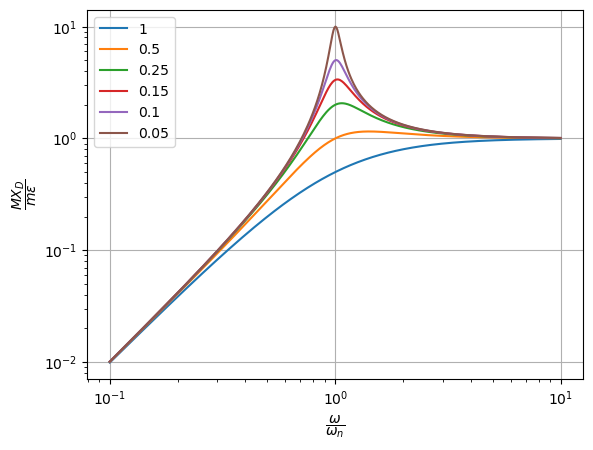

In [94]:
Zeta=[1, 0.5, 0.25, 0.15, 0.1, 0.05]
rw=np.linspace(0.1,10,1000) # w/wn

def amp_desb(zeta):
    return rw**2/(np.sqrt((1-rw**2)**2 + (2*zeta*rw)**2))
    
plt.figure()
for i in range (0,len(Zeta)):
    Hi=amp_desb(Zeta[i])
    plt.plot(rw,Hi)
plt.ylabel(r'$\dfrac{M X_D}{m \epsilon}$')
plt.xlabel(r'$\dfrac{\omega}{\omega_n}$')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend([str(Zeta[0]),str(Zeta[1]),str(Zeta[2]),str(Zeta[3]),str(Zeta[4]),str(Zeta[5])])
plt.show()

* quando $\left(\dfrac{\omega}{\omega_n}\right) << 1 \Rightarrow \dfrac{MX_D}{m \epsilon} \approx 0$
* quando $\left(\dfrac{\omega}{\omega_n}\right) = 1 \Rightarrow \dfrac{MX_D}{m \epsilon} = \dfrac{1}{2 \zeta}$
* quando $\left(\dfrac{\omega}{\omega_n}\right) >> 1 \Rightarrow \dfrac{MX_D}{m \epsilon} \rightarrow 1, \quad \phi \approx \pi$

$\Rightarrow$ quando o rotor gira com velocidade angular muito acima da pulsação natural do sistema, a amplitude da resposta dinâmica é $X_D = \dfrac{m}{M}\epsilon$ e $\phi = 180^{\circ}$. Portanto, nestas rotações o movimento é tal que o centro de massa da máquina $M$ permanece estacionário

## Equação de Lagrange para Sistemas Não-Conservativos

$\dfrac{d}{dt} \left( \dfrac{\partial \mathscr{L}}{\partial \dot{q}_i}\right) - \dfrac{\partial \mathscr{L}}{\partial q_i} + \dfrac{\partial D}{\partial \dot{q}_i} = \dfrac{\partial W}{\partial q_i}$

Onde $W$ é o trabalho das **Forças Ativas**:

$W_i = F_i . s_i$

$s_i$ é uma função das coordenadas generalizadas, trata-se do deslocamento (linear ou angular) associado à força ativa $F_i$.

[Avançar para o próximo capítulo](Vibs4.ipynb)

[Voltar para o menu inicial](LEIAME.ipynb)